In [2]:
# Load all the reviews into a single df
import os
import pandas as pd

# Initialize empty list to store dataframes
dfs = []

# Walk through the RMPT100Reviews/combined directory
for root, dirs, files in os.walk('../../RMPT100Reviews/universities'):
    for file in files:
        if file == 'reviews.csv':
            # Construct full file path
            file_path = os.path.join(root, file)
            # Read CSV and append to list
            df = pd.read_csv(file_path)
            dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

# Format numbers to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(df.describe())


,index,clarity_rating,difficulty_rating,helpful_rating,quality_rating,textbook_use,thumbs_down_total,thumbs_up_total,would_take_again,pid
count,3396084.000,3396084.000,3396084.000,3396084.000,3396084.000,2962539.000,3396084.000,3396084.000,1514149.000,3396084.000
mean,27498.122,3.644,3.052,3.668,3.734,2.402,0.335,0.593,0.778,1298904.319
std,21383.378,1.500,1.222,1.517,1.480,2.193,2.476,8.208,0.416,913176.954
min,0.000,1.000,1.000,-1.000,1.000,-1.000,-99.000,-99.000,0.000,47.000
25%,10019.000,2.000,2.000,2.000,3.000,0.000,0.000,0.000,1.000,420036.000
50%,22674.000,4.000,3.000,4.000,4.000,3.000,0.000,0.000,1.000,1206166.000
75%,40959.000,5.000,4.000,5.000,5.000,5.000,0.000,0.000,1.000,2108671.000
max,107192.000,5.000,5.000,5.000,5.000,5.000,964.000,13600.000,1.000,3073231.000


{4: 916339, 3: 1948847, 6: 19463, 0: 156345, 1: 155023, 5: 21341, 2: 172453, 7: 1886, 8: 3286, 9: 791, 12: 48, 10: 197, 11: 48, 14: 5, 13: 5, 15: 7}


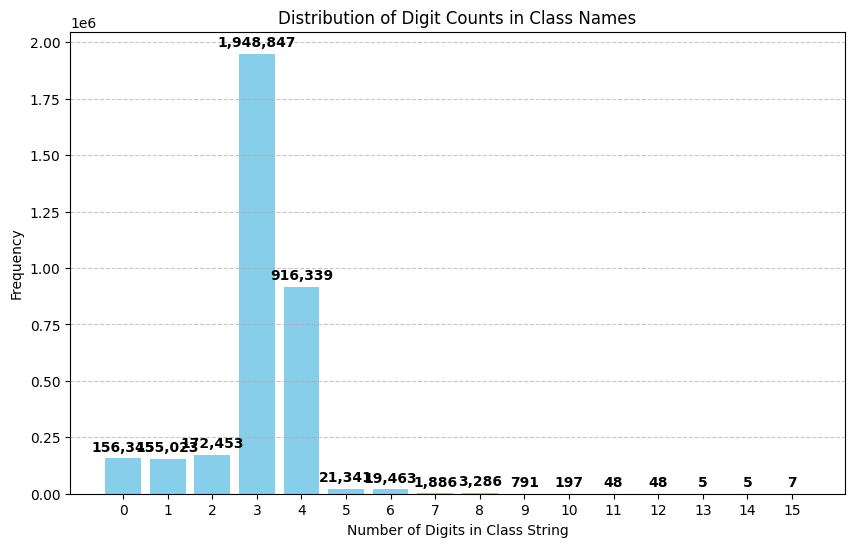

In [ ]:
# Count the number of digits in each class string
# Count the number of digits in each class string
number_counts = {}
for class_str in df['class'].astype(str):
    digits = sum(c.isdigit() for c in class_str)
    number_counts[digits] = number_counts.get(digits, 0) + 1

# Convert to a format suitable for plotting
digit_counts = list(number_counts.keys())
frequencies = list(number_counts.values())

# Create a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(digit_counts, frequencies, color='skyblue')
plt.xlabel('Number of Digits in Class String')
plt.ylabel('Frequency')
plt.title('Distribution of Digit Counts in Class Names')
plt.xticks(digit_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the counts as text
for i, v in enumerate(frequencies):
    plt.text(digit_counts[i], v + max(frequencies)*0.01, f"{v:,}", 
             ha='center', va='bottom', fontweight='bold')

print(number_counts)
plt.show()



In [4]:
#if we handle only cases with 3 and 4 digits - we will cover approx 84% of cases - these will have a very high confidence
print((number_counts[3] + number_counts[4]) / sum(number_counts.values()))

#also can use similar idealogy for classes with different digits like in UMass classification


0.8436734780411792


In [1]:
'''
Take our umass idealogy and apply it to the rest of our data with a more standard approach
'''
print("\nclasses taught by the first 10 professors:")
# Ensure that the 'classes_taught' column is treated as a list
professors_df['classes_taught'] = professors_df['classes_taught'].apply(lambda x: eval(x) if isinstance(x, str) else x)
classes_taught = professors_df['classes_taught'].head(10).tolist()  # Convert to list for easier |logging
for class_array in classes_taught:
    print(class_array)  # Print each array on a new line

print(type(professors_df['classes_taught']))

#Lets split these into bins so we can get a better idea of what errors there are
# Function to count classes based on the number of digits
def count_classes(classes_list):
    counts = {
        '0_numbers': 0,
        'less_than_3_numbers': 0,
        '3_numbers': 0,
        'more_than_3_numbers': 0
    }
    
    for classes in classes_list:
        # Read each class string independently
        for string in classes:
            num_count = sum(c.isdigit() for c in string)
            if num_count == 0:
                counts['0_numbers'] += 1
            elif num_count < 3:
                counts['less_than_3_numbers'] += 1
            elif num_count == 3:
                counts['3_numbers'] += 1
            else:
                counts['more_than_3_numbers'] += 1
    
    return counts

# Get the classes taught by professors as a list of lists
classes_taught = professors_df['classes_taught'].tolist()
print(len(classes_taught))

# Count the classes
class_counts = count_classes(classes_taught)

# Print the class counts for review
print("\nClass Counts: out of " + str(sum(class_counts.values())))
for category, count in class_counts.items():
    print(f"{category}: {count}")


# Create a mapping dictionary to map classes to a common name based on their number, grouped by professor ID
class_mapping = {}

# Iterate through each professor's classes along with their IDs
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number and len(class_number) == 3:  # Only proceed if there is a number with exactly 3 digits
            if professor_id not in class_mapping:
                class_mapping[professor_id] = {}
            if class_number not in class_mapping[professor_id]:
                class_mapping[professor_id][class_number] = [class_name]  # Initialize with a list
            else:
                class_mapping[professor_id][class_number].append(class_name)  # Append to the existing list

# Print the mapping for review
print("\nClass Mapping by Professor ID:")
for professor_id, classes in class_mapping.items():
    print(f"Professor ID {professor_id}:")
    for number, names in classes.items():
        print(f"  {number}: {', '.join(names)}")  # Join the class names for display


# AFTER THIS POINT - ALL CLASSES WITH n DIGITS WILL BE MAPPED

def count_total_classes(class_mapping):
    #"""Count the total number of class names in the class_mapping."""
    total_objects = sum(len(name_list) for classes in class_mapping.values() for name_list in classes.values())
    print(f"Total objects in class_mapping: {total_objects}")

# Call the function to count total classes - we will use this periodically to see how many we have left.
count_total_classes(class_mapping)


# Extract classes with no numeric part
no_number_classes = []

for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        if not any(char.isdigit() for char in class_name):  # Check if there are no digits in the class name
            no_number_classes.append((professor_id, class_name))

# It's very difficult to distinguish between these classes, so we will set them aside in a misc category
for professor_id, class_name in no_number_classes:
    if professor_id not in class_mapping:
        class_mapping[professor_id] = {}
    if 'misc' not in class_mapping[professor_id]:
        class_mapping[professor_id]['misc'] = []  # Initialize a list for miscellaneous classes
    class_mapping[professor_id]['misc'].append(class_name)  # Append to the list of miscellaneous classes

# Print the mapping for review
print("\nMiscellaneous Class Mapping by Professor ID:")
misc_classes = [(professor_id, ', '.join(classes['misc'])) for professor_id, classes in class_mapping.items() if 'misc' in classes]
for professor_id, class_names in misc_classes[:20]: 
    print(f"Professor ID {professor_id}: {class_names}") 

count_total_classes(class_mapping)




classes taught by the first 10 professors:


NameError: name 'professors_df' is not defined

In [58]:
def get_mapping_for_professor(reviews, verbose=1):
    # Extract only needed columns and filter out non-string class values early
    reviews = reviews[['pid', 'class']]
    reviews = reviews[reviews['class'].apply(lambda x: isinstance(x, str))]
    
    if reviews.empty:
        return None, False
    
    # Check if all professor IDs are the same
    first_pid = reviews['pid'].iloc[0]
    all_same_pid = (reviews['pid'] == first_pid).all()
    
    if not all_same_pid:
        if verbose:
            print(f"Warning: Not all reviews have the same professor ID. Found {reviews['pid'].nunique()} unique professor IDs.")
        return None, False
    
    # Get class list once and pass over the class list once
    class_list = reviews['class'].dropna().tolist()
    total_classes = len(class_list)
    # If no classes, return early
    if total_classes == 0:
        if verbose:
            print("No classes found.")
        return {'misc': {'list': class_list}}, False
    
    unique_classes = reviews['class'].unique()
    counts = {}
    for class_name in class_list:
        digits = len(''.join(filter(str.isdigit, class_name)))
        counts[digits] = counts.get(digits, 0) + 1
    
    # Check for majority digit count
    majority_threshold = 0.6
    majority_digit_count = None
    
    for digits, count in counts.items():
        percentage = count / total_classes
        if percentage > majority_threshold:
            majority_digit_count = digits
            if verbose:
                print(f"Found a majority digit count: {digits} digits (appears in {count}/{total_classes} classes, {percentage:.2%})")
            break
    
    # If no clear majority, determine best approach
    if majority_digit_count is None:
        if verbose:
            print(f"No majority digit count found. Distribution: {counts}")
        
        # Count class occurrences, now for overall reviews
        class_counts = {}
        for class_name in class_list:
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
        
        # Find classes with >10% occurrence in overall reviews
        threshold = 0.1 * total_classes
        significant_classes = {cls: count for cls, count in class_counts.items() if count >= threshold}
        
        if significant_classes:
            if verbose:
                print(f"Found {len(significant_classes)} classes with >10% of reviews")
            
            # Create class mapping with significant classes and misc
            class_mapping = {}
            for cls in significant_classes:
                class_mapping[cls] = {'list': [cls]}
            
            # Add all other classes to misc
            misc_classes = [cls for cls in class_list if cls not in significant_classes]
            class_mapping['misc'] = {'list': misc_classes}
            
            return class_mapping, True
        else:
            if verbose:
                print("No classes with >10% of reviews found, using most common digit count")
            
            # Determine digit count to use
            majority_digit_count = 3 if counts.get(3, 0) > 0 else max(counts.items(), key=lambda x: x[1])[0] if counts else None
    
    # Initialize class mapping
    class_mapping = {'misc': {'list': []}}
    
    # Special handling for zero-digit case
    if majority_digit_count == 0:
        # Count class occurrences for threshold calculation
        class_counts = {}
        for class_name in class_list:
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
        
        # Find classes with >10% occurrence
        threshold = 0.1 * total_classes
        significant_classes = {cls: count for cls, count in class_counts.items() if count >= threshold}
        
        # Extract alpha-only versions of class names
        alpha_only_classes = {}
        for class_name in unique_classes:
            alpha_only = ''.join(filter(str.isalpha, class_name.upper()))
            if alpha_only:
                alpha_only_classes[class_name] = alpha_only
            else:
                class_mapping['misc']['list'].append(class_name)
        
        # Group classes by substring containment
        grouped = {}
        ungrouped = set(alpha_only_classes.keys())
        
        # Sort by length descending to prioritize longer strings as group labels
        sorted_classes = sorted(alpha_only_classes.keys(), key=lambda x: len(alpha_only_classes[x]), reverse=True)
        
        for potential_group in sorted_classes:
            if potential_group not in ungrouped:
                continue
                
            alpha_potential = alpha_only_classes[potential_group]
            group_members = [potential_group]
            ungrouped.remove(potential_group)
            
            # Find all classes that are substrings (in order) of this one
            for other_class in list(ungrouped):
                alpha_other = alpha_only_classes[other_class]
                
                # Check if letters from other_class appear in the same order in potential_group
                i, j = 0, 0
                while i < len(alpha_other) and j < len(alpha_potential):
                    if alpha_other[i] == alpha_potential[j]:
                        i += 1
                    j += 1
                
                if i == len(alpha_other):  # All letters found in order
                    group_members.append(other_class)
                    ungrouped.remove(other_class)
            
            # Use the class name as key if it has >10% reviews, otherwise use the alpha string
            group_key = potential_group
            if not any(cls in significant_classes for cls in group_members):
                if len(group_members) == 1:
                    class_mapping['misc']['list'].extend(group_members)
                    continue
                
            grouped[group_key] = group_members
        
        # Add grouped classes to mapping
        for group_key, group_members in grouped.items():
            class_mapping[group_key] = {'list': group_members, 'prefix': '', 'suffix': ''}

        return class_mapping, True #no need to do prefix or suffix as only strings
    else:
        # Process classes with digits
        for class_name in unique_classes:
            strnumbers = ''.join(filter(str.isdigit, class_name))
            
            if not strnumbers:
                class_mapping['misc']['list'].append(class_name)
                continue
            
            try:
                number = int(strnumbers)
                digits = len(strnumbers)
                
                if majority_digit_count is not None:
                    if digits == majority_digit_count:
                        if number not in class_mapping:
                            class_mapping[number] = {'list': []}
                        class_mapping[number]['list'].append(class_name)
                    elif digits > majority_digit_count and majority_digit_count != 0 and digits % majority_digit_count == 0:
                        # Split the number into sections
                        for i in range(0, len(strnumbers), majority_digit_count):
                            section_num = int(strnumbers[i:i+majority_digit_count])
                            if section_num not in class_mapping:
                                class_mapping[section_num] = {'list': []}
                            class_mapping[section_num]['list'].append(class_name)
                    else:
                        class_mapping['misc']['list'].append(class_name)
                else:
                    class_mapping['misc']['list'].append(class_name)
            except ValueError:
                class_mapping['misc']['list'].append(class_name)

    # Find common prefixes and suffixes
    from itertools import takewhile
    from collections import Counter
    
    for class_number in list(class_mapping.keys()):
        if class_number == 'misc':
            continue
            
        class_list = class_mapping[class_number]['list']
        
        # Extract prefixes and suffixes in one pass
        prefixes = []
        suffixes = []
        
        for class_name in class_list:
            prefix = ''.join(takewhile(lambda x: not x.isdigit(), class_name))
            suffix = ''.join(takewhile(lambda x: not x.isdigit(), class_name[::-1]))[::-1]
            
            prefixes.append(prefix)
            suffixes.append(suffix)
        
        # Use Counter for efficient counting
        prefix_counter = Counter(prefixes)
        suffix_counter = Counter(suffixes)
        
        # Get most common prefix and suffix
        class_mapping[class_number]['prefix'] = prefix_counter.most_common(1)[0][0] if prefix_counter else ""
        class_mapping[class_number]['suffix'] = suffix_counter.most_common(1)[0][0] if suffix_counter else ""
    
    return class_mapping, majority_digit_count is not None

print(get_mapping_for_professor(df[df['pid']==214460]))


Found a majority digit count: 0 digits (appears in 13/17 classes, 76.47%)
({'misc': {'list': ['STATEPOLICY']}, 'CULTUREPOWER': {'list': ['CULTUREPOWER', 'CULTPOWE'], 'prefix': '', 'suffix': ''}, 'RACISMANDES': {'list': ['RACISMANDES', 'RACISM'], 'prefix': '', 'suffix': ''}, 'ANTHAMER': {'list': ['ANTHAMER', 'ANTH367', 'ANTH150', 'ANTH339', 'ANTH', 'ANTH210'], 'prefix': '', 'suffix': ''}}, True)


In [61]:
# Initialize an empty dictionary to store the overall class mapping
# Check if overall_class_mapping exists, if not initialize it
redo = True
load = False
if load:
    overall_class_mapping = pd.read_pickle('revised_mapping.pkl')
    
elif redo or ('overall_class_mapping' not in locals() or 'overall_class_mapping' not in globals()):
    overall_class_mapping = {}

    # Get unique professor IDs
    unique_pids = df['pid'].unique()
    print(f"Total number of unique professors: {len(unique_pids)}")

    # Initialize counters for majority tracking
    majority_true_count = 0
    majority_false_count = 0
    total_processed = 0

    # Import for progress bar
    from tqdm import tqdm

    # Process each professor's data with a progress bar
    for i, pid in tqdm(enumerate(unique_pids), total=len(unique_pids), desc="Processing professors"):
        try:
            # Get reviews for this professor
            prof_reviews = df[df['pid'] == pid]
            
            # Skip professors with no reviews
            if len(prof_reviews) == 0:
                continue
                
            # Get class mapping for this professor
            prof_mapping, has_majority = get_mapping_for_professor(prof_reviews, verbose=0)
            overall_class_mapping[pid] = prof_mapping
            # Track majority status
            if has_majority:
                majority_true_count += 1
            else:
                majority_false_count += 1
            total_processed += 1
            
        except Exception as e:
            print(f"Error processing professor {pid}: {str(e)}")

    # Print final majority statistics
    majority_true_percent = (majority_true_count / total_processed) * 100 if total_processed > 0 else 0
    majority_false_percent = (majority_false_count / total_processed) * 100 if total_processed > 0 else 0

print(f"\nFinal majority stats: True: {majority_true_count} ({majority_true_percent:.2f}%), False: {majority_false_count} ({majority_false_percent:.2f}%)")

# Go through reviews and check if class is not in misc of class_mapping
print("\nReviews with classes not in misc:")
count = 0
for i, row in df.iterrows():
    pid = row['pid']
    class_name = row['class']
    
    # Check if this professor has a mapping and if the class is not in misc
    if pid in overall_class_mapping and overall_class_mapping[pid] is not None:
        misc_classes = overall_class_mapping[pid].get('misc', {}).get('list', [])
        if class_name not in misc_classes:
            count += 1

print(f"Total reviews with classes not in misc: {count}")


# Save the overall class mapping to a pickle file
import pickle

# Define the file path for saving
mapping_file_path = 'revised_mapping.pkl' # revised has different logic for non-majority and 0 digit cases

# Save the mapping to a pickle file
with open(mapping_file_path, 'wb') as f:
    pickle.dump(overall_class_mapping, f)

print(f"\nClass mapping saved to '{mapping_file_path}'")




Total number of unique professors: 251237


Processing professors:   0%|          | 0/251237 [00:00<?, ?it/s]

Processing professors: 100%|██████████| 251237/251237 [2:05:18<00:00, 33.42it/s]     



Final majority stats: True: 251231 (100.00%), False: 6 (0.00%)

Reviews with classes not in misc:
Total reviews with classes not in misc: 3050542

Class mapping saved to 'revised_mapping.pkl'


In [62]:
print(str(count/len(df)) + " of reviews have classes not in misc") #was 87 before

0.8982528111789932 of reviews have classes not in misc


In [63]:
# Load the saved mapping to analyze potential problems
with open('revised_mapping.pkl', 'rb') as f:
    loaded_mapping = pickle.load(f)

print(f"Loaded mapping contains {len(loaded_mapping)} professors")

# Check for problematic mappings
problem_count = 0
problems = {
    'empty_mapping': 0,
    'no_majority': 0,
    'empty_misc': 0,
    'large_misc': 0,
    'few_classes': 0
}

for pid, mapping in loaded_mapping.items():
    if mapping is None or len(mapping) == 0:
        problems['empty_mapping'] += 1
        problem_count += 1
        continue
        
    # Check if there's no majority class
    if 'majority' not in mapping or mapping['majority'] is None:
        problems['no_majority'] += 1
        
    # Check if misc is empty or contains too many classes
    if 'misc' not in mapping or 'list' not in mapping['misc'] or len(mapping['misc']['list']) == 0:
        problems['empty_misc'] += 1
    elif len(mapping['misc']['list']) > 10:  # Arbitrary threshold for "too many" misc classes
        problems['large_misc'] += 1
        
    # Check if professor has very few classes overall
    total_classes = 0
    for digit in mapping:
        if digit != 'majority' and digit != 'misc' and isinstance(mapping[digit], dict):
            total_classes += len(mapping[digit].get('list', []))
    
    if total_classes < 3:  # Arbitrary threshold for "too few" classes
        problems['few_classes'] += 1

print(f"\nFound {problem_count} professors with completely problematic mappings")
print("\nProblem breakdown:")
for problem_type, count in problems.items():
    print(f"- {problem_type}: {count} professors ({count/len(loaded_mapping)*100:.2f}%)")

# Sample a few problematic mappings to inspect
print("\nSample of problematic mappings:")
samples = 0
for pid, mapping in loaded_mapping.items():
    if mapping is None or len(mapping) == 0:
        print(f"\nProfessor {pid}: Empty mapping")
        samples += 1
    elif 'majority' not in mapping or mapping['majority'] is None:
        print(f"\nProfessor {pid}: No majority class")
        print(f"Mapping: {mapping}")
        samples += 1
    
    if samples >= 3:  # Limit to 3 samples
        break


Loaded mapping contains 251237 professors

Found 6 professors with completely problematic mappings

Problem breakdown:
- empty_mapping: 6 professors (0.00%)
- no_majority: 251231 professors (100.00%)
- empty_misc: 190259 professors (75.73%)
- large_misc: 5418 professors (2.16%)
- few_classes: 142442 professors (56.70%)

Sample of problematic mappings:

Professor 775570: No majority class
Mapping: {'misc': {'list': ['BIOL1000', 'COMM0800', 'COMM', 'COMM2012', 'COMMXXXX', 'COMM1', 'COMMCOMM', 'COMMSECT', 'PRODUCING', 'FINMKTGINDIES', 'FUNDRAISING']}, 550: {'list': ['COM550', 'COMM550'], 'prefix': 'COM', 'suffix': ''}, 524: {'list': ['COM524', 'COMM524', 'COMM524001', '524'], 'prefix': 'COMM', 'suffix': ''}, 80: {'list': ['COMM080', 'COMM080002', 'COM080'], 'prefix': 'COMM', 'suffix': ''}, 1: {'list': ['COMM001', 'COMM524001', 'COMM661001W'], 'prefix': 'COMM', 'suffix': ''}, 880: {'list': ['COM880'], 'prefix': 'COM', 'suffix': ''}, 501: {'list': ['COMM501'], 'prefix': 'COMM', 'suffix': ''